In [1]:
import numpy as np
import pandas as pd

## Import data

In [2]:
data = pd.read_csv('XYZCorp_LendingData.txt', sep = '\t', encoding = 'ISO-8859-1')

C:\Users\sragh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## View Data

In [3]:
#Transposing as there are many columns and fewer rows to display
data.head().transpose()

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975,2500,2400,10000,3000
...,...,...,...,...,...
total_rev_hi_lim,NaN,NaN,NaN,NaN,NaN
inq_fi,NaN,NaN,NaN,NaN,NaN
total_cu_tl,NaN,NaN,NaN,NaN,NaN
inq_last_12m,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(855969, 73)

In [5]:
#Display all rows
pd.set_option('display.max_rows', 73)
pd.set_option('display.width', 1000)

In [6]:
data.head().transpose()

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975,2500,2400,10000,3000
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65,15.27,15.96,13.49,12.69
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5


In [7]:
#Data types of Columns
data.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths           

## Understanding Data

In [8]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
data['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

## Checking Null Values

In [10]:
data.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [11]:
#Getting column names
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'm

### Setting Index

In [12]:
data['id'].nunique()

855969

In [13]:
data['member_id'].nunique()

855969

Since, member_id indicates that the customer has been given a loan setting it as index and dropping id

In [14]:
data.set_index('member_id',inplace = True)
data[:3].head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
member_id,,,,,,,,,,,,,,,,,,,,,
1296599,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1314167,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1313524,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
data.drop('id', inplace = True, axis = 1)

In [16]:
#Checking dimensions
data.shape

(855969, 71)

### Getting Summary - To fill Null values according to Mean or Median or Mode

In [17]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,855969.0,14745.571335,8425.340005,500.00,8000.0000,13000.000,20000.000000,3.500000e+04
funded_amnt,855969.0,14732.378305,8419.471653,500.00,8000.0000,13000.000,20000.000000,3.500000e+04
funded_amnt_inv,855969.0,14700.061226,8425.805478,0.00,8000.0000,13000.000,20000.000000,3.500000e+04
int_rate,855969.0,13.192320,4.368365,5.32,9.9900,12.990,15.990000,2.899000e+01
installment,855969.0,436.238072,243.726876,15.69,260.5500,382.550,571.560000,1.445460e+03
annual_inc,855969.0,75071.185963,64264.469813,0.00,45000.0000,65000.000,90000.000000,9.500000e+06
dti,855969.0,18.122165,17.423629,0.00,11.8800,17.610,23.900000,9.999000e+03
delinq_2yrs,855969.0,0.311621,0.857189,0.00,0.0000,0.000,0.000000,3.900000e+01
inq_last_6mths,855969.0,0.680915,0.964033,0.00,0.0000,0.000,1.000000,8.000000e+00
mths_since_last_delinq,416157.0,34.149943,21.868500,0.00,15.0000,31.000,50.000000,1.880000e+02


In [18]:
data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].mean(), inplace = True)

In [19]:
data['mths_since_last_delinq'].isna().sum()

0

In [20]:
data['mths_since_last_record'].fillna(data['mths_since_last_record'].mean(),inplace = True)

In [21]:
data['mths_since_last_record'].isna().sum()

0

In [22]:
data['mths_since_last_major_derog'].fillna(data['mths_since_last_major_derog'].mean(), inplace = True)

In [23]:
data['mths_since_last_major_derog'].isna().sum()

0

In [24]:
#Since dtu_join is Null only where the Loan/Application Type is individual, filling it with constant
data['dti_joint'].fillna(0, inplace = True)

In [25]:
data['dti_joint'].isna().sum()

0

In [26]:
data.shape

(855969, 71)

In [27]:
#Removing all columns (unnecessary one's) where the null values are more than 30% of the values
data.drop(data.columns[data.isna().sum() == 842681].tolist(), axis = 1, inplace = True)

In [28]:
data.shape

(855969, 59)

In [29]:
data.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_last_record              0
open_acc    

In [30]:
data.drop(['mths_since_rcnt_il'], inplace = True, axis = 1)
data.shape

(855969, 58)

In [31]:
#Finding the count in each class
data.groupby('il_util').agg(np.size).transpose()

il_util,0.0,0.5,0.7,1.1,1.2,1.8,1.9,2.1,2.4,2.7,...,151.3,152.2,152.6,154.7,155.7,158.5,170.6,176.3,179.2,223.3
loan_amnt,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
funded_amnt,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
funded_amnt_inv,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
term,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
int_rate,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
installment,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
grade,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sub_grade,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
emp_title,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
emp_length,71.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [32]:
data['il_util'].describe()

count    11609.000000
mean        71.486993
std         23.015293
min          0.000000
25%         58.500000
50%         75.000000
75%         87.500000
max        223.300000
Name: il_util, dtype: float64

In [33]:
#Simply exploring with Median
data['il_util'].fillna(data['il_util'].median(), inplace = True)

In [34]:
data['il_util'].isna().sum()

0

### Converting Categorical into Factor

In [35]:
#default_ind column is treated as numeric, converting it into Factor
data['default_ind'] = pd.factorize(data['default_ind'])[0]

In [36]:
data.columns[data.isna().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'annual_inc_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], dtype='object')

In [37]:
data.iloc[0, data.columns.get_loc('next_pymnt_d')]

nan

In [38]:
cols = ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

for i in cols:
    data[i] = pd.to_datetime(data[i])
    data[i] = data[i].fillna(data.iloc[0, data.columns.get_loc(i)])

In [39]:
data.columns[data.isna().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'next_pymnt_d', 'collections_12_mths_ex_med', 'annual_inc_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], dtype='object')

In [40]:
data.loc[data['next_pymnt_d'].first_valid_index()]['next_pymnt_d']

Timestamp('2016-02-01 00:00:00')

In [41]:
data['next_pymnt_d'].fillna(data.loc[data['next_pymnt_d'].first_valid_index()]['next_pymnt_d'], inplace = True)

In [42]:
data.columns[data.isna().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'collections_12_mths_ex_med', 'annual_inc_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], dtype='object')

In [43]:
data[data.columns[data.isna().any()]].head()

,emp_title,emp_length,desc,title,revol_util,collections_12_mths_ex_med,annual_inc_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
member_id,,,,,,,,,,,
1296599,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,83.7,0.0,NaN,NaN,NaN,NaN,NaN
1314167,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,9.4,0.0,NaN,NaN,NaN,NaN,NaN
1313524,NaN,10+ years,NaN,real estate business,98.5,0.0,NaN,NaN,NaN,NaN,NaN
1277178,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,21.0,0.0,NaN,NaN,NaN,NaN,NaN
1311748,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,Personal,53.9,0.0,NaN,NaN,NaN,NaN,NaN


In [44]:
data.loc[data['verification_status_joint'].first_valid_index()]['verification_status_joint']

'Not Verified'

In [45]:
cols = ['revol_util', 'collections_12_mths_ex_med', 'annual_inc_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

for i in cols:
    data[i].fillna(data[i].mean(), inplace = True)

In [46]:
data.columns[data.isna().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'verification_status_joint'], dtype='object')

In [47]:
data['verification_status_joint'].fillna(data['verification_status_joint'].mode()[0], inplace = True)

## Write Cleansed Data as CSV

Used by Tableau

In [48]:
#data.to_csv('Cleansed Data.csv')

## Dropping Un-necessary Columns

In [49]:
data.drop(['zip_code', 'addr_state', 'desc', 'title', 'earliest_cr_line', 'emp_title', 'sub_grade', 'policy_code', 'purpose'], axis = 1, inplace = True)

In [50]:
len(data.columns)

49

## Feature Engineering

In [51]:
data['emp_length'].head()

member_id
1296599    10+ years
1314167     < 1 year
1313524    10+ years
1277178    10+ years
1311748       1 year
Name: emp_length, dtype: object

In [52]:
data['emp_length'].dtypes

dtype('O')

In [53]:
# Cleaning Employee Length Info
data['emp_length'].replace(regex = True, inplace = True, to_replace = r'10\+', value = r'10')
data['emp_length'].replace(regex = True, inplace = True, to_replace = r'year', value = r'')
data['emp_length'].replace(regex = True, inplace = True, to_replace = r' s', value = r'')
data['emp_length'].replace(regex = True, inplace = True, to_replace = r'< 1', value = r'0')
data['emp_length'].replace(regex = True, inplace = True, to_replace = r' ', value = r'')

data['emp_length'] = data['emp_length'].astype(str)
data['emp_length'].head()

member_id
1296599    10
1314167     0
1313524    10
1277178    10
1311748     1
Name: emp_length, dtype: object

In [54]:
#Checking for Missing values
data['emp_length'].isna().sum()

0

In [55]:
data['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', 'nan'],
      dtype=object)

In [56]:
data[data['emp_length'] == 'nan']['int_rate'].mean()

13.236918557393858

In [57]:
data[data['emp_length'] == '9']['int_rate'].mean()

13.235036160419744

In [58]:
#Treating 'nan' as Null values
data['emp_length'].replace(regex = True, inplace = True, to_replace = 'nan', value = np.nan)

In [59]:
data['emp_length'].isna().sum()

43061

In [60]:
data['emp_length'].fillna('9', inplace = True)

In [61]:
data['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7'],
      dtype=object)

In [62]:
data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [63]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [64]:
data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [65]:
data['verification_status_joint'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [66]:
data['application_type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [67]:
data['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [68]:
cols = ['grade', 'verification_status', 'home_ownership', 'pymnt_plan', 'verification_status_joint', 'application_type', 'initial_list_status']

for i in cols:
    data[i] = pd.factorize(data[i])[0]

In [69]:
data['grade'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [70]:
data['home_ownership'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [71]:
data['verification_status'].unique()

array([0, 1, 2], dtype=int64)

In [72]:
data['verification_status_joint'].unique()

array([0, 1, 2], dtype=int64)

In [73]:
data['application_type'].unique()

array([0, 1], dtype=int64)

In [74]:
data['initial_list_status'].unique()

array([0, 1], dtype=int64)

### One hot coding

In [75]:
from sklearn.preprocessing import LabelBinarizer

In [76]:
lb = LabelBinarizer()
#One hot coding
x = lb.fit_transform(data['emp_length'].values)

In [77]:
#Creating Dataframe based on One Hot Coding values and columns
dfOneHot = pd.DataFrame(x, columns = ["Emp_Length_"+str(int(i)) for i in range(x.shape[1])])
dfOneHot

,Emp_Length_0,Emp_Length_1,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
855964,0,0,0,0,0,0,0,0,0,1,0
855965,0,0,1,0,0,0,0,0,0,0,0
855966,0,0,0,0,0,0,1,0,0,0,0
855967,0,1,0,0,0,0,0,0,0,0,0


In [78]:
len(data.columns)

49

In [79]:
#Pre-preparing for merging based on index
dfOneHot.set_index(data.index, inplace = True)

In [80]:
#Merged both the data
data = pd.concat([data, dfOneHot], axis = 1)
print(len(data.columns))
data.columns

60


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'il_util', 'total_rev_hi_lim', 'default_ind', 'Emp_Length_0', 'Emp_Length_1', 'Emp_Length_2', 'Emp_Length_3', 'Emp_Length_4', 'Emp_Length_5', 'Emp_Length_6', 'Emp_Length_7', 'Emp_Length_8',
       'Emp_

In [81]:
#Dropping redundant column
data.drop('emp_length', axis = 1, inplace = True)
len(data.columns)

59

In [82]:
x = lb.fit_transform(data['term'].values)

In [83]:
x.shape

(855969, 1)

In [84]:
data['term'] = x
data['term'].head()

member_id
1296599    0
1314167    1
1313524    0
1277178    0
1311748    1
Name: term, dtype: int32

In [85]:
data['term'].unique()

array([0, 1], dtype=int64)

## EDA

In [86]:
#Displaying only mean and median to understand data (find outliers)
data.describe().transpose()[['mean', '50%']]

,mean,50%
loan_amnt,14745.571335,13000.000000
funded_amnt,14732.378305,13000.000000
funded_amnt_inv,14700.061226,13000.000000
term,0.298782,0.000000
int_rate,13.192320,12.990000
installment,436.238072,382.550000
grade,1.759513,1.000000
home_ownership,1.101646,2.000000
annual_inc,75071.185963,65000.000000
verification_status,0.973939,1.000000


In [87]:
b = data.columns[data.isna().any()].tolist()

c = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_amnt', 'annual_inc_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

for i in b:
    if i in c:
        c.remove(i)

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

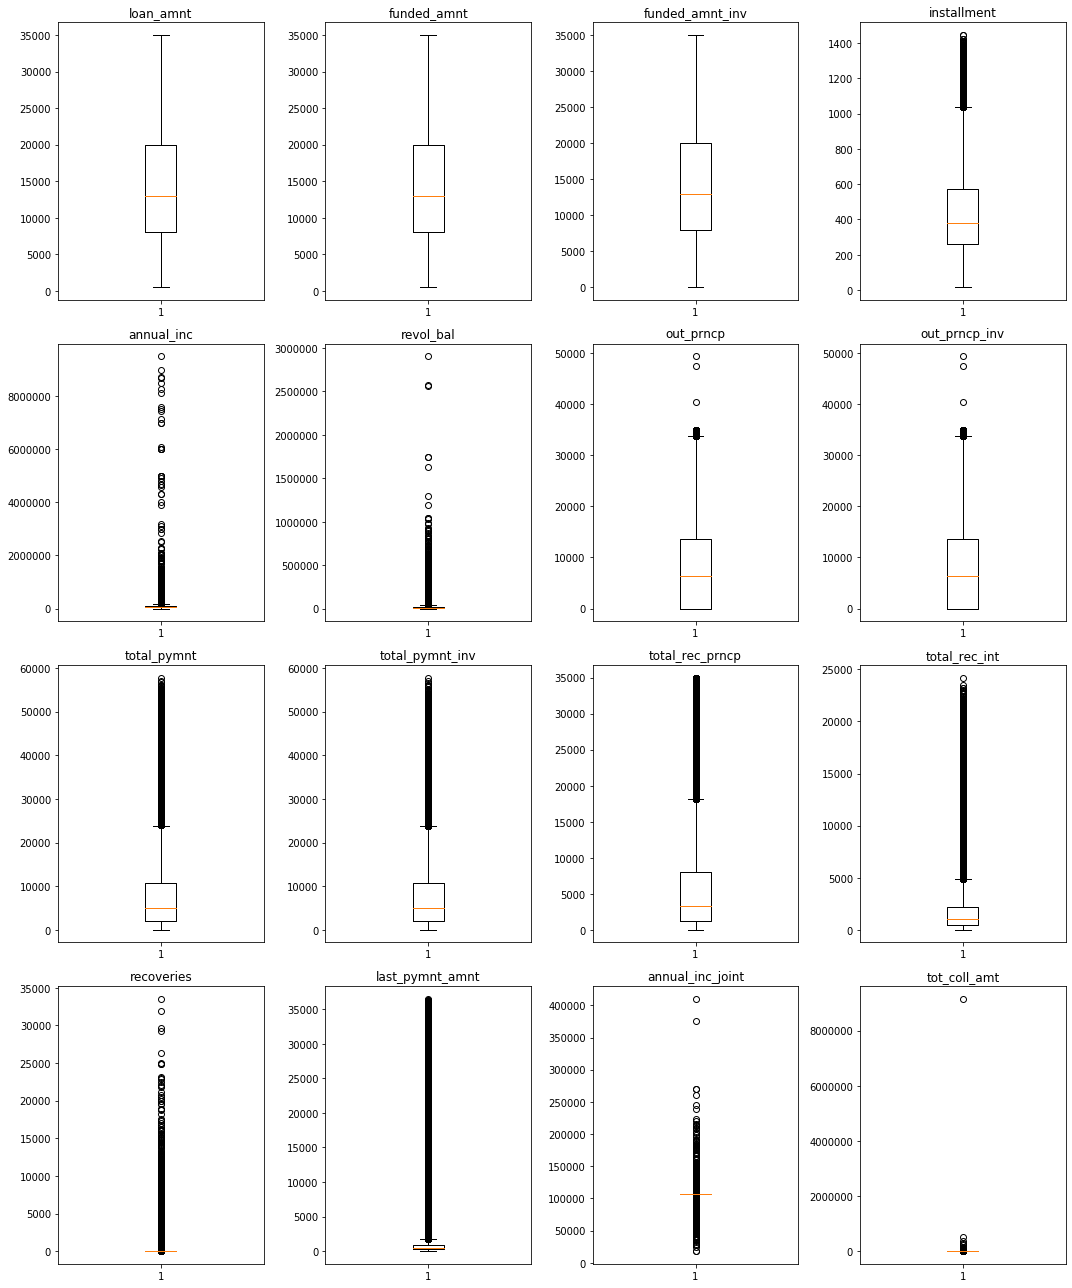

In [89]:
k = 0

fig, axes = plt.subplots(4, 4, figsize = (15, 18))
try:
    for i in range(4):
        for j in range(4):
            axes[i, j].boxplot(data[c[k]])
            axes[i,j].set_title(c[k])
            k += 1
    plt.tight_layout()
except IndexError:
    pass

In [90]:
for i in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']:
    c.remove(i)

In [91]:
for i in c:
    q3 = np.percentile(data[i], [75 ,25])[0]
    q1 = np.percentile(data[i], [75 ,25])[1]
    iqr = q3 - q1
    up_bound = q3 + 1.5 * iqr
    data.loc[data[i] > up_bound, i] = up_bound

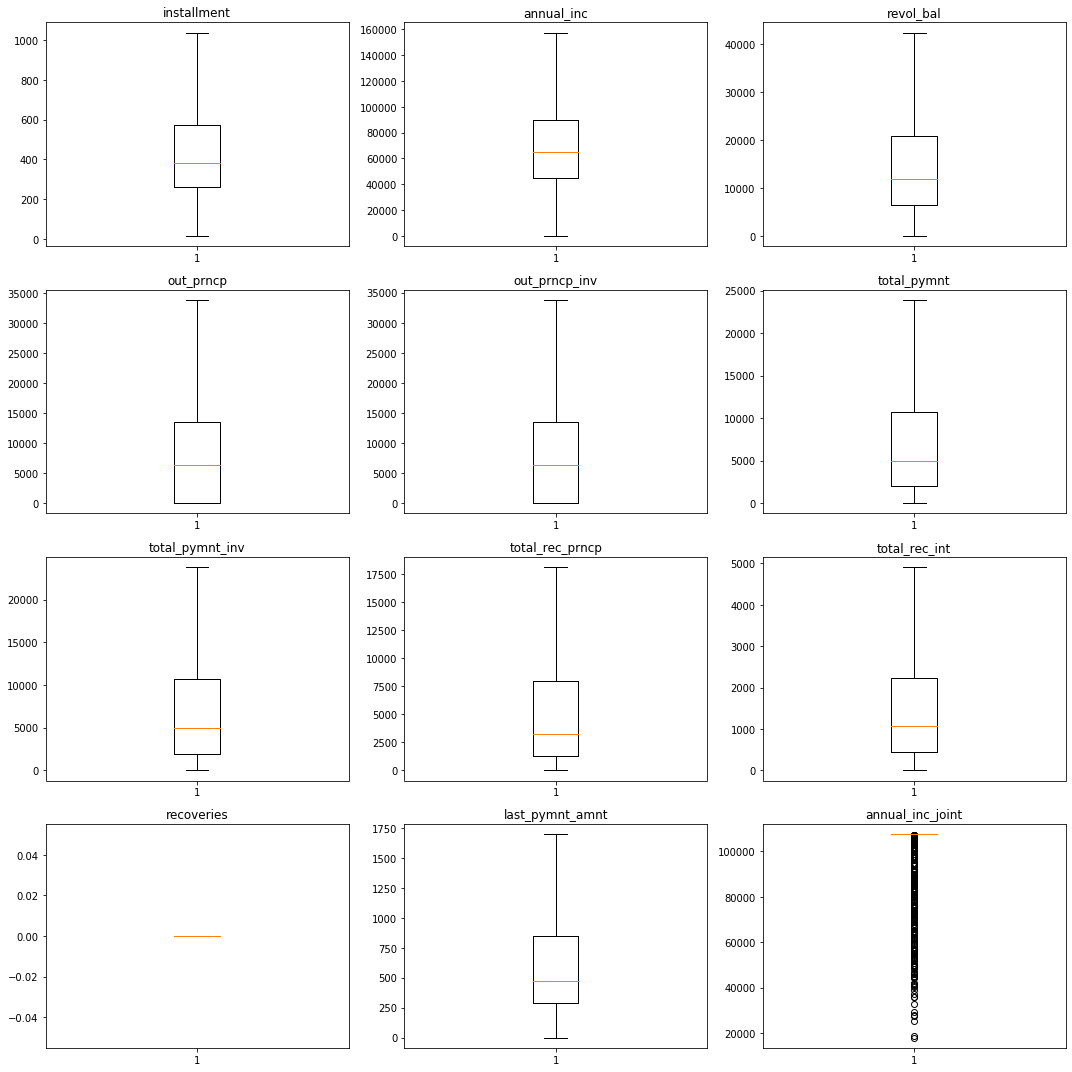

In [92]:
k = 0

fig, axes = plt.subplots(4, 3, figsize = (15, 15))
try:
    for i in range(4):
        for j in range(3):
            axes[i, j].boxplot(data[c[k]])
            axes[i,j].set_title(c[k])
            k += 1
    plt.tight_layout()
except IndexError:
    pass

In [93]:
import seaborn as sns

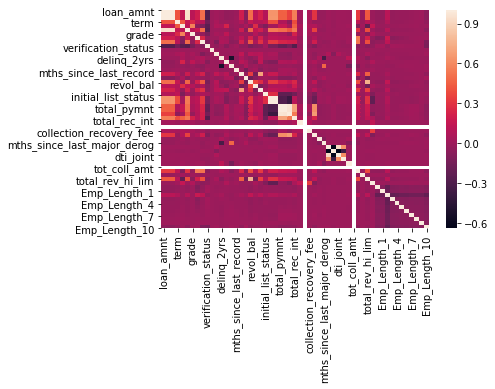

In [94]:
## Write Cleansed Data as CSVplt.figure(figsize = (15, 8))
sns.heatmap(data.corr())

In [95]:
data.groupby('default_ind').mean().transpose()

default_ind,0,1
loan_amnt,14755.476206,14573.018486
funded_amnt,14744.071602,14528.669271
funded_amnt_inv,14716.632534,14411.372330
term,0.295341,0.358728
int_rate,13.030057,16.019092
installment,432.817888,437.510303
grade,1.726316,2.337853
home_ownership,1.109298,0.968343
annual_inc,72060.719042,63290.641673
verification_status,0.981453,0.843050


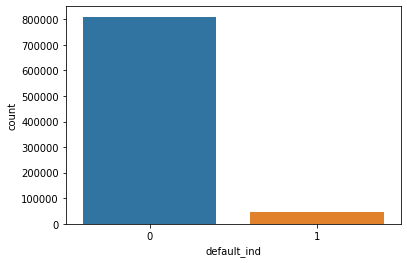

In [96]:
sns.countplot(x = 'default_ind', data = data)

### Percentage of Data distributed (Also Tableau represented)

In [97]:
print('Loan Defaulter %: ', (len(data[data['default_ind'] == 0]) / data.shape[0]) * 100)

Loan Defaulter %:  94.57141555360066


In [98]:
print('Loan Non-Defaulter %: ', (len(data[data['default_ind'] == 1]) / data.shape[0]) * 100)

Loan Non-Defaulter %:  5.428584446399344


__NOTE:__ The above percentages show that the classes are imbalanced

## Write Cleansed Data as CSV

In [99]:
#data.to_csv('Cleansed Data Final.csv')

## Seperating Dependent and Independent Variable

In [100]:
#Sorting for training and test data-set
data['issue_d'] = pd.to_datetime(data['issue_d'])
data = data.sort_values('issue_d')

In [101]:
X = data.drop('default_ind', axis = 1)
y = data.loc[:,'default_ind']

In [102]:
X.shape

(855969, 58)

In [103]:
y.shape

(855969,)

In [104]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,Emp_Length_1,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10
member_id,,,,,,,,,,,,,,,,,,,,,
86999,7500.0,7500.0,800.0,0,13.75,255.43,3,1,22000.0,2,...,0,0,0,0,0,0,0,0,0,0
90962,5000.0,5000.0,4150.0,0,7.43,155.38,2,2,150000.0,2,...,0,0,0,0,0,0,0,0,1,0
98991,5750.0,5750.0,3675.0,0,7.43,178.69,2,2,125000.0,2,...,0,1,0,0,0,0,0,0,0,0
112227,5000.0,5000.0,3975.0,0,7.43,155.38,2,0,40000.0,2,...,0,0,0,0,0,0,1,0,0,0
109346,1200.0,1200.0,0.0,0,11.54,39.60,1,0,20000.0,2,...,0,0,0,0,0,0,0,0,0,0


In [105]:
y.head()

member_id
86999     0
90962     0
98991     0
112227    0
109346    0
Name: default_ind, dtype: int64

## Visualization

Text(0.5, 0, 'Interest Rate (%)')

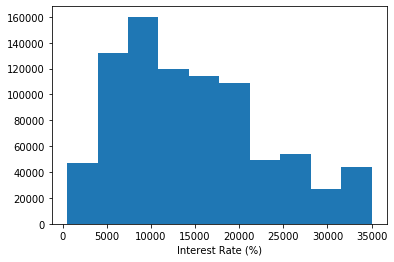

In [106]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.hist(X['loan_amnt'], histtype = 'bar')
plt.xlabel('Interest Rate (%)')

Text(0.5, 0, 'Interest Rate (%)')

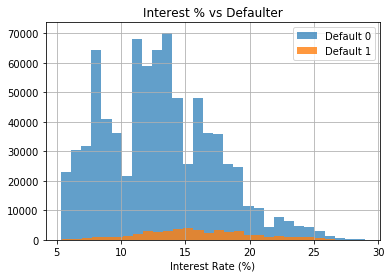

In [107]:
X[data['default_ind'] == 0]['int_rate'].hist(alpha = 0.7, label = 'Default 0', bins = 30)
X[data['default_ind'] == 1]['int_rate'].hist(alpha = 0.8, label = 'Default 1', bins = 30)
plt.legend()
plt.xlabel('Interest Rate')
plt.title('Interest % vs Defaulter')
plt.xlabel('Interest Rate (%)')

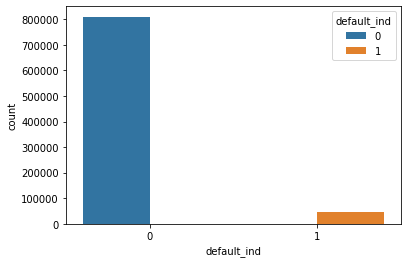

In [108]:
sns.countplot('default_ind', hue='default_ind', data=data)

## Splitting Data in Training and Test Data-set

In [109]:
sum(X['issue_d'] <= 'May-2015')

598978

In [110]:
X.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'il_util', 'total_rev_hi_lim', 'Emp_Length_0', 'Emp_Length_1', 'Emp_Length_2', 'Emp_Length_3', 'Emp_Length_4', 'Emp_Length_5', 'Emp_Length_6', 'Emp_Length_7', 'Emp_Length_8', 'Emp_Length_9', 'Emp_Length_10'], dtype='

In [111]:
X.iloc[598977, 10]

Timestamp('2015-05-01 00:00:00')

### Converting Train Dates columns to Float

In [112]:
cols = data.columns[data.dtypes == 'datetime64[ns]']

for i in cols:
    data[i] = (data[i] - data[i].min())/np.timedelta64(1, 'M')
    data[i] = data[i].round()
    data[i] = pd.to_numeric(data[i], downcast = 'integer')

In [113]:
data.columns[data.dtypes == 'datetime64[ns]']

Index([], dtype='object')

__NOTE:__ Converting Datetime of columns to numbers of month since the first occured month in the specific column, as the format for all is of the form mm-yyyy

In [114]:
X = data.drop(['default_ind', 'issue_d'], axis = 1)
y = data.loc[:, 'default_ind']

In [115]:
train_X, train_y = X.iloc[:598978, :], y.iloc[:598978,]

In [116]:
train_X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,Emp_Length_1,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10
member_id,,,,,,,,,,,,,,,,,,,,,
86999,7500.0,7500.0,800.0,0,13.75,255.43,3,1,22000.0,2,...,0,0,0,0,0,0,0,0,0,0
90962,5000.0,5000.0,4150.0,0,7.43,155.38,2,2,150000.0,2,...,0,0,0,0,0,0,0,0,1,0
98991,5750.0,5750.0,3675.0,0,7.43,178.69,2,2,125000.0,2,...,0,1,0,0,0,0,0,0,0,0
112227,5000.0,5000.0,3975.0,0,7.43,155.38,2,0,40000.0,2,...,0,0,0,0,0,0,1,0,0,0
109346,1200.0,1200.0,0.0,0,11.54,39.60,1,0,20000.0,2,...,0,0,0,0,0,0,0,0,0,0


In [117]:
train_y.head()

member_id
86999     0
90962     0
98991     0
112227    0
109346    0
Name: default_ind, dtype: int64

In [118]:
test_X, test_y = X.iloc[598978:, :], y.iloc[598978:,]

In [119]:
test_X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,Emp_Length_1,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10
member_id,,,,,,,,,,,,,,,,,,,,,
55457247,35000.0,35000.0,35000.0,0,9.17,1038.075,0,2,130000.0,0,...,1,0,0,0,0,0,0,0,0,0
55086031,11500.0,11500.0,11475.0,1,9.17,239.680,0,0,74000.0,1,...,0,1,0,0,0,0,0,0,0,0
55287617,12000.0,12000.0,12000.0,1,15.61,289.340,5,0,48000.0,1,...,0,0,1,0,0,0,0,0,0,0
55396770,35000.0,35000.0,35000.0,0,12.29,1038.075,1,2,121000.0,0,...,0,0,0,1,0,0,0,0,0,0
53224173,27000.0,27000.0,27000.0,1,8.18,549.800,0,2,100000.0,1,...,0,1,0,0,0,0,0,0,0,0


In [120]:
test_y.head()

member_id
55457247    0
55086031    0
55287617    0
55396770    0
53224173    0
Name: default_ind, dtype: int64

In [121]:
data.groupby('default_ind').agg(len)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,Emp_Length_1,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10
default_ind,,,,,,,,,,,,,,,,,,,,,
0,809502.0,809502.0,809502.0,809502,809502.0,809502.0,809502,809502,809502.0,809502,...,809502,809502,809502,809502,809502,809502,809502,809502,809502,809502
1,46467.0,46467.0,46467.0,46467,46467.0,46467.0,46467,46467,46467.0,46467,...,46467,46467,46467,46467,46467,46467,46467,46467,46467,46467


## Multi - collinearity

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
def mul_col_vif(train_X):
    vif = pd.DataFrame()
    vif['Features'] = train_X.columns
    vif['VIF'] = [variance_inflation_factor(train_X.values, i) for i in range(train_X.shape[1])]
    print(vif.isnull().sum())
    vif.dropna(inplace = True)
    print()
    print(vif.isnull().sum())
    return vif

In [124]:
train_X = train_X.drop('funded_amnt_inv', axis = 1)
u = mul_col_vif(train_X)
u

C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sragh\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features    0
VIF         5
dtype: int64

Features    0
VIF         0
dtype: int64


,Features,VIF
0,loan_amnt,4.779445e+02
1,funded_amnt,5.380959e+02
2,term,7.129421e+00
3,int_rate,3.505830e+00
4,installment,5.440023e+01
5,grade,1.506469e+00
6,home_ownership,1.506408e+00
7,annual_inc,2.118139e+00
8,verification_status,1.270065e+00
9,pymnt_plan,1.000078e+00


In [125]:
u = u.loc[:44,]
u

,Features,VIF
0,loan_amnt,477.944453
1,funded_amnt,538.095857
2,term,7.129421
3,int_rate,3.505830
4,installment,54.400232
5,grade,1.506469
6,home_ownership,1.506408
7,annual_inc,2.118139
8,verification_status,1.270065
9,pymnt_plan,1.000078


In [126]:
train_X = train_X.drop(['total_pymnt_inv', 'out_prncp', 'installment', 'funded_amnt'], axis = 1)
u = mul_col_vif(train_X)
u

Features    0
VIF         5
dtype: int64

Features    0
VIF         0
dtype: int64


,Features,VIF
0,loan_amnt,7.084397
1,term,1.831624
2,int_rate,2.988666
3,grade,1.497796
4,home_ownership,1.505989
5,annual_inc,2.117849
6,verification_status,1.268947
7,pymnt_plan,1.000072
8,dti,1.479461
9,delinq_2yrs,1.479034


In [127]:
u = u.loc[:40,]
u

,Features,VIF
0,loan_amnt,7.084397
1,term,1.831624
2,int_rate,2.988666
3,grade,1.497796
4,home_ownership,1.505989
5,annual_inc,2.117849
6,verification_status,1.268947
7,pymnt_plan,1.000072
8,dti,1.479461
9,delinq_2yrs,1.479034


In [128]:
train_X = train_X.drop(['total_pymnt', 'revol_bal'], axis = 1)
u = mul_col_vif(train_X)
u

Features    0
VIF         5
dtype: int64

Features    0
VIF         0
dtype: int64


,Features,VIF
0,loan_amnt,6.423957
1,term,1.806919
2,int_rate,2.917264
3,grade,1.494207
4,home_ownership,1.499237
5,annual_inc,2.063978
6,verification_status,1.268118
7,pymnt_plan,1.000070
8,dti,1.447968
9,delinq_2yrs,1.477104


In [129]:
u = u.loc[:38,]
u

,Features,VIF
0,loan_amnt,6.423957
1,term,1.806919
2,int_rate,2.917264
3,grade,1.494207
4,home_ownership,1.499237
5,annual_inc,2.063978
6,verification_status,1.268118
7,pymnt_plan,1.000070
8,dti,1.447968
9,delinq_2yrs,1.477104


In [130]:
#Removing the columns from test data also
test_X = test_X.drop(['funded_amnt_inv', 'total_pymnt_inv', 'out_prncp', 'installment', 'funded_amnt', 'total_pymnt', 'revol_bal'], axis = 1)

## Standard Scaling

In [131]:
#Works on Numeric Data only
cols_ind = [0, 1, 2, 8, 12, 19, 23, 24, 25, 26, 27, 28, 29, 31, 33, 39, 44, 46]

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
sc = StandardScaler()

In [134]:
data[data.columns[cols_ind]] = sc.fit_transform(data[data.columns[cols_ind]])

In [135]:
data[data.columns[cols_ind]].head()

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,annual_inc_joint,tot_cur_bal,total_rev_hi_lim
member_id,,,,,,,,,,,,,,,,,,
86999,-0.859974,-0.859007,-1.649702,-1.431087,-0.219941,-0.964682,-0.979629,-0.979622,0.283225,-0.930458,0.385575,0.092994,-0.088527,-0.079247,-0.766625,0.014296,0.053937,0.146766
90962,-1.156698,-1.155938,-1.252114,2.263186,-1.040092,-0.798954,-0.979629,-0.979622,-0.311337,-0.438435,-0.077468,-0.970139,-0.088527,-0.079247,1.895555,0.014296,0.053937,0.146766
98991,-1.067681,-1.066858,-1.308488,1.541648,-1.024596,-1.084521,-0.979629,-0.979622,-0.126893,-0.466701,0.061445,-0.622477,-0.088527,-0.079247,-1.232819,0.014296,0.053937,0.146766
112227,-1.156698,-1.155938,-1.272883,-0.911580,-0.893739,-1.107024,-0.979629,-0.979622,-0.249346,-0.415842,-0.077468,-0.677080,-0.088527,-0.079247,-0.947920,0.014296,0.053937,0.146766
109346,-1.607719,-1.607273,-1.744649,-1.488810,-0.923009,-1.231365,-0.979629,-0.979622,-0.865676,-1.076057,-0.781293,-0.934347,-0.088527,-0.079247,-1.168568,0.014296,0.053937,0.146766


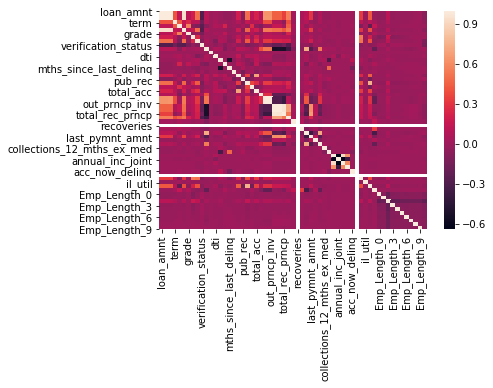

In [136]:
## Write Cleansed Data as CSVplt.figure(figsize = (15, 8))
sns.heatmap(data.corr())

In [137]:
data.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,Emp_Length_1,Emp_Length_2,Emp_Length_3,Emp_Length_4,Emp_Length_5,Emp_Length_6,Emp_Length_7,Emp_Length_8,Emp_Length_9,Emp_Length_10
loan_amnt,1.000000,0.999265,0.997601,0.411192,0.142966,0.949648,0.113410,0.196468,0.507935,-0.281637,...,-0.031032,0.111586,-0.027464,-0.021470,-0.015009,-0.013041,-0.005879,0.000239,0.005548,-0.055159
funded_amnt,0.999265,1.000000,0.998485,0.410209,0.143116,0.950678,0.113336,0.196327,0.507690,-0.281071,...,-0.031078,0.111763,-0.027499,-0.021628,-0.015110,-0.013131,-0.005990,0.000322,0.005599,-0.054977
funded_amnt_inv,0.997601,0.998485,1.000000,0.410575,0.143374,0.948854,0.112958,0.196305,0.506807,-0.281529,...,-0.031815,0.112406,-0.027741,-0.021841,-0.015282,-0.013166,-0.005952,0.000511,0.005753,-0.054371
term,0.411192,0.410209,0.410575,1.000000,0.427411,0.158157,0.258175,0.110425,0.110238,-0.168264,...,-0.020444,0.069696,-0.017403,-0.015632,-0.010517,-0.006857,-0.003048,0.003409,0.005249,-0.033686
int_rate,0.142966,0.143116,0.143374,0.427411,1.000000,0.129222,0.569403,-0.063466,-0.111897,-0.250940,...,-0.003535,0.002448,-0.004921,-0.005950,-0.001978,0.001211,0.007700,0.010896,0.000923,0.003140
installment,0.949648,0.950678,0.948854,0.158157,0.129222,1.000000,0.108849,0.165652,0.489703,-0.275156,...,-0.027019,0.096456,-0.024251,-0.018141,-0.012345,-0.010632,-0.003559,0.001281,0.004898,-0.049527
grade,0.113410,0.113336,0.112958,0.258175,0.569403,0.108849,1.000000,-0.022486,-0.030920,-0.132046,...,-0.001102,0.000413,-0.002551,-0.002674,0.001797,-0.000458,-0.000265,0.002499,-0.000411,0.003997
home_ownership,0.196468,0.196327,0.196305,0.110425,-0.063466,0.165652,-0.022486,1.000000,0.249242,-0.030135,...,-0.073610,0.174192,-0.071150,-0.048920,-0.031439,-0.018917,-0.002655,0.005149,0.014639,0.013557
annual_inc,0.507935,0.507690,0.506807,0.110238,-0.111897,0.489703,-0.030920,0.249242,1.000000,-0.095839,...,-0.027327,0.126936,-0.019235,-0.013915,-0.009222,-0.007610,-0.004591,-0.001535,0.005486,-0.108510
verification_status,-0.281637,-0.281071,-0.281529,-0.168264,-0.250940,-0.275156,-0.132046,-0.030135,-0.095839,1.000000,...,0.037571,-0.022901,0.035093,0.027051,0.018419,0.014966,0.010409,0.005449,0.005426,-0.124096


In [138]:
data[['Emp_Length_0', 'default_ind']].corr()

,Emp_Length_0,default_ind
Emp_Length_0,1.000000,0.005209
default_ind,0.005209,1.000000


## Multi - collinearity

## Model Building

### Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
log_reg_mod = LogisticRegression()

In [141]:
log_reg_mod.fit(train_X, train_y)

C:\Users\sragh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
pred_y = log_reg_mod.predict(test_X)

In [143]:
from sklearn.metrics import classification_report

In [144]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.78      0.79      0.79       311

    accuracy                           1.00    256991
   macro avg       0.89      0.90      0.89    256991
weighted avg       1.00      1.00      1.00    256991



In [145]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [146]:
def plot_ConfusionMatrix_metrics(conf_mat, test_y, pred_y, figsize = None, class_names = None, hide_spines = False, hide_ticks = False, title = ''): 
    
    if figsize is None:
        figsize = (len(conf_mat)*5, len(conf_mat)*5)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    matshow = ax.matshow(conf_mat)
    
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ''
            cell_text += format(conf_mat[i, j], '.0f')
            ax.text(x=j,
                        y=i,
                        s=cell_text,
                        va='center',
                        ha='center',
                        fontsize = 20,
                        color="white" if [i, j] != [0, 0]
                        else "black")

    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
    ax.xaxis.set_ticks_position('top')
    
    ax.set_xticklabels(class_names, fontsize = 17)
    ax.set_yticklabels(class_names, fontsize = 17)
    ax.xaxis.set_label_coords(0.5, 1.15)
    
    plt.title(title, fontsize = 20, y = 1.2)
    plt.xlabel('Predicted', fontsize = 15)
    plt.ylabel('Actual', fontsize = 15)
    
    ax.text(2.5, 0.2, 'Accuracy %:' + str(round(accuracy_score(test_y, pred_y) * 100, 2)), fontsize = 17)
    ax.text(1.8, 0.4, 'Precision %: ' + str(round(precision_score(test_y, pred_y) *100, 2)), fontsize = 17)
    ax.text(3.4, 0.4, 'Sensitivity: ' + str(round(conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][0]), 2)), fontsize = 17)
    ax.text(1.8, 0.7, 'Specificity: ' + str(round(conf_mat[1][1] / (conf_mat[0][1] + conf_mat[1][1]), 2)), fontsize = 17)
    ax.text(3.4, 0.7, 'F1 Score: ' + str(round(f1_score(test_y, pred_y), 2)), fontsize = 17)
    ax.text(2.725, 0.55, 'AUC: ' + str(round(roc_auc_score(test_y, pred_y), 2)), fontsize = 17)
    
    plt.tight_layout()

C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


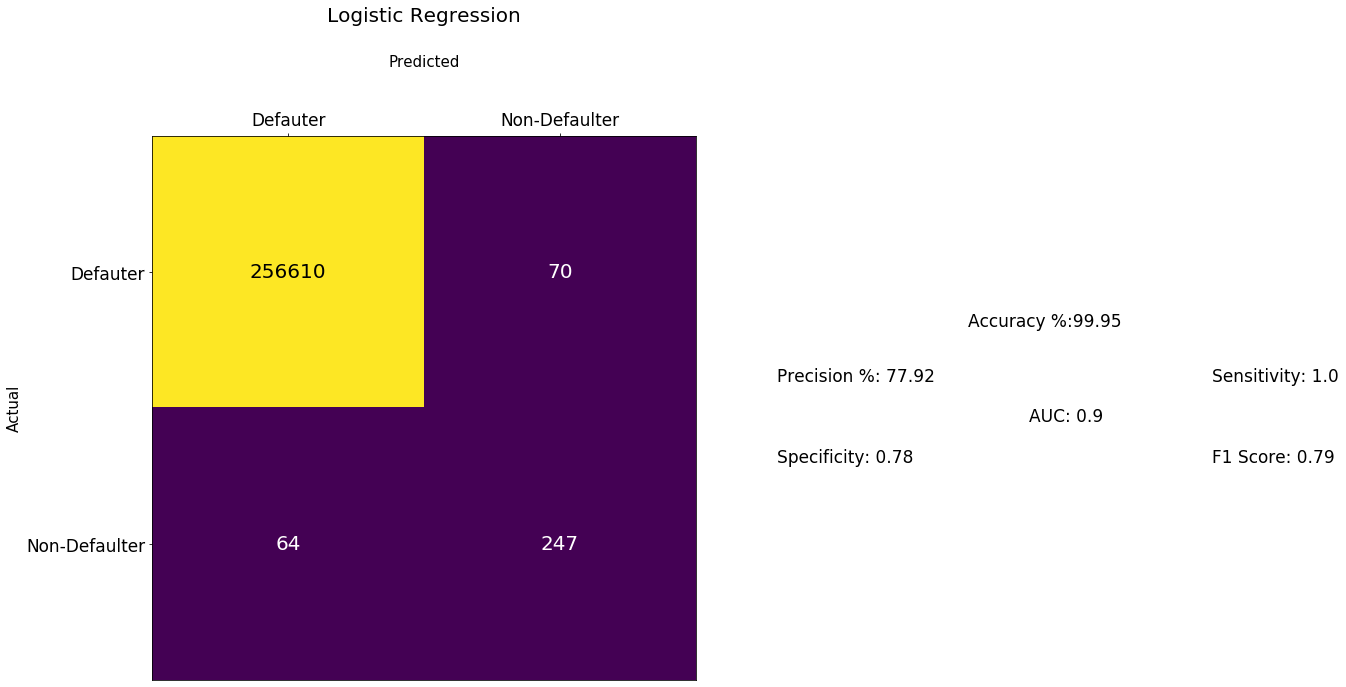

In [147]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Logistic Regression')

In [148]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [149]:
def roc_auc_plot(test_y, pred_y, title):
    roc_auc = roc_auc_score(test_y, pred_y)
    fpr, tpr, thres = roc_curve(test_y, log_reg_mod.predict_proba(test_X)[:,1])

    #AUC AND FPR.TPR AND THRESHOLDS
    plt.figure()
    plt.plot(fpr,tpr,label='%s (Area = %0.2f)' % (title, roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Poitive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AND AUC for {title}')
    plt.legend(loc="lower right")

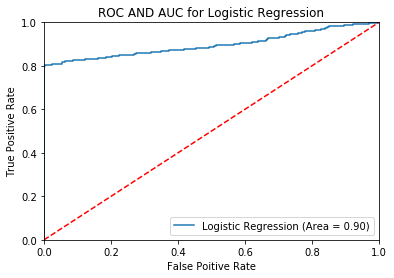

In [150]:
roc_auc_plot(test_y, pred_y, 'Logistic Regression')

In [151]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.79


### Decision Tree

In [152]:
from sklearn.tree import DecisionTreeClassifier

#### Via GINI Index

Lower the better (less impure)

In [153]:
dec_tre_gini = DecisionTreeClassifier(criterion = 'gini')

In [154]:
dec_tre_gini.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [155]:
pred_y = dec_tre_gini.predict(test_X)

C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


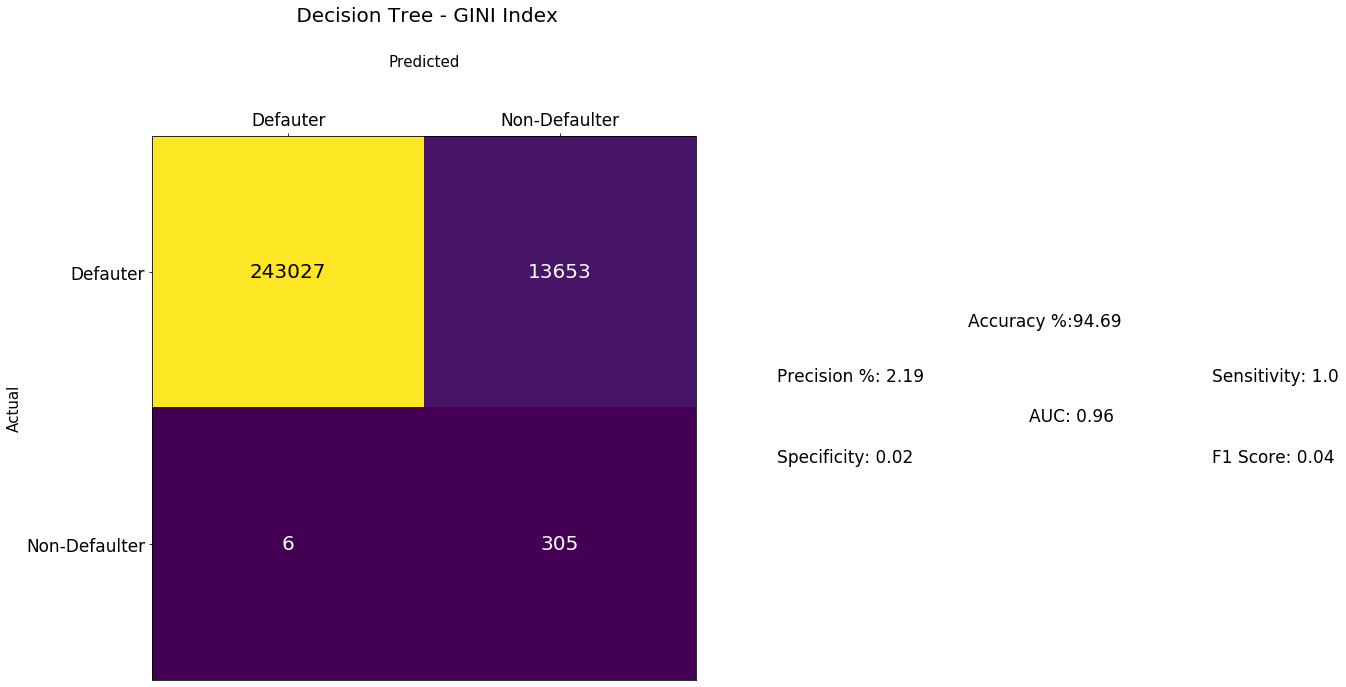

In [156]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = ' Decision Tree - GINI Index')

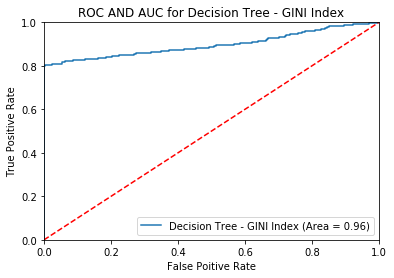

In [157]:
roc_auc_plot(test_y, pred_y, 'Decision Tree - GINI Index')

In [158]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.98


#### Via Entropy

In [159]:
dec_tre_ent = DecisionTreeClassifier(criterion = 'entropy')

In [160]:
dec_tre_ent.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [161]:
pred_y = dec_tre_ent.predict(test_X)

In [162]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    256680
           1       0.02      1.00      0.04       311

    accuracy                           0.95    256991
   macro avg       0.51      0.97      0.51    256991
weighted avg       1.00      0.95      0.97    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


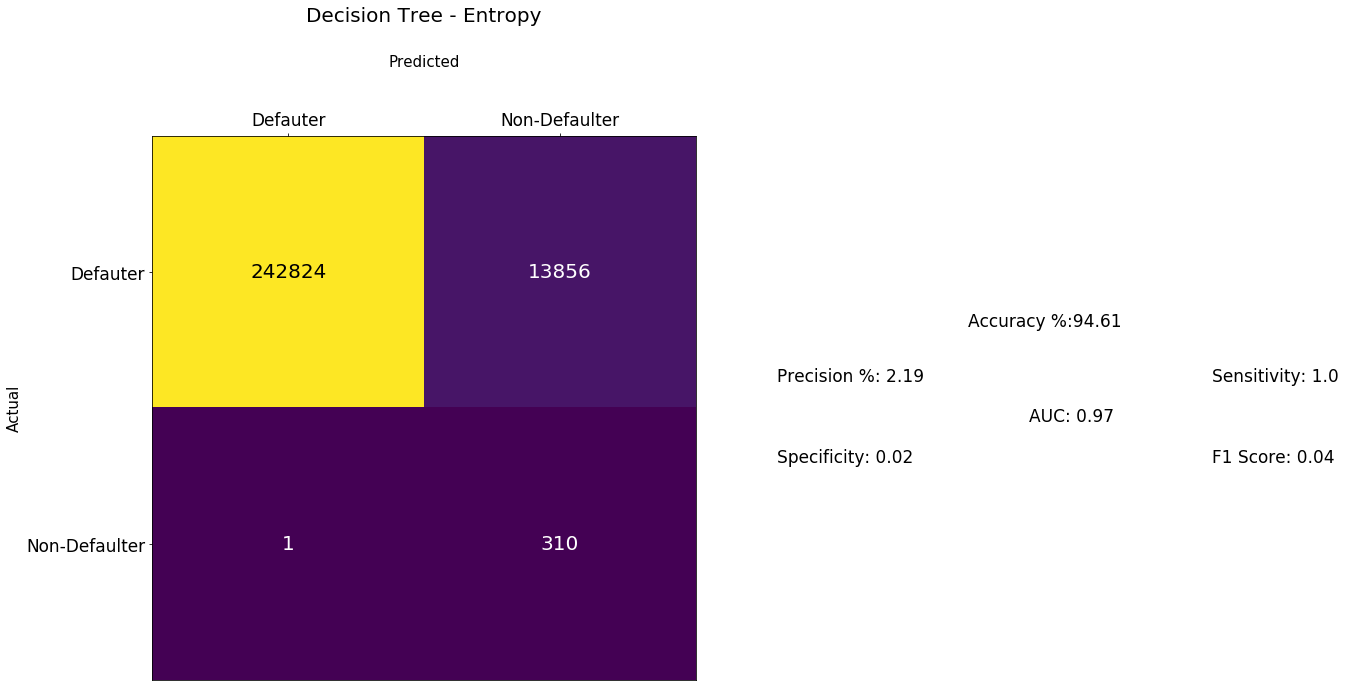

In [163]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Decision Tree - Entropy')

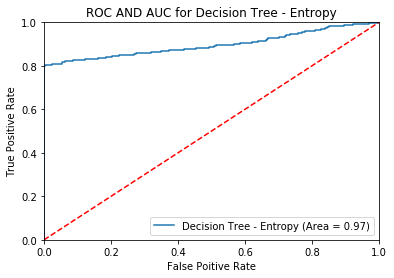

In [164]:
roc_auc_plot(test_y, pred_y, 'Decision Tree - Entropy')

In [165]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 1.00


### Bagging - Boot-strap AGGregation

In [166]:
from sklearn.ensemble import BaggingClassifier

In [167]:
bag_mod = BaggingClassifier()

In [168]:
bag_mod.fit(train_X, train_y)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [169]:
pred_y = bag_mod.predict(test_X)

In [170]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    256680
           1       0.02      1.00      0.04       311

    accuracy                           0.95    256991
   macro avg       0.51      0.97      0.51    256991
weighted avg       1.00      0.95      0.97    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


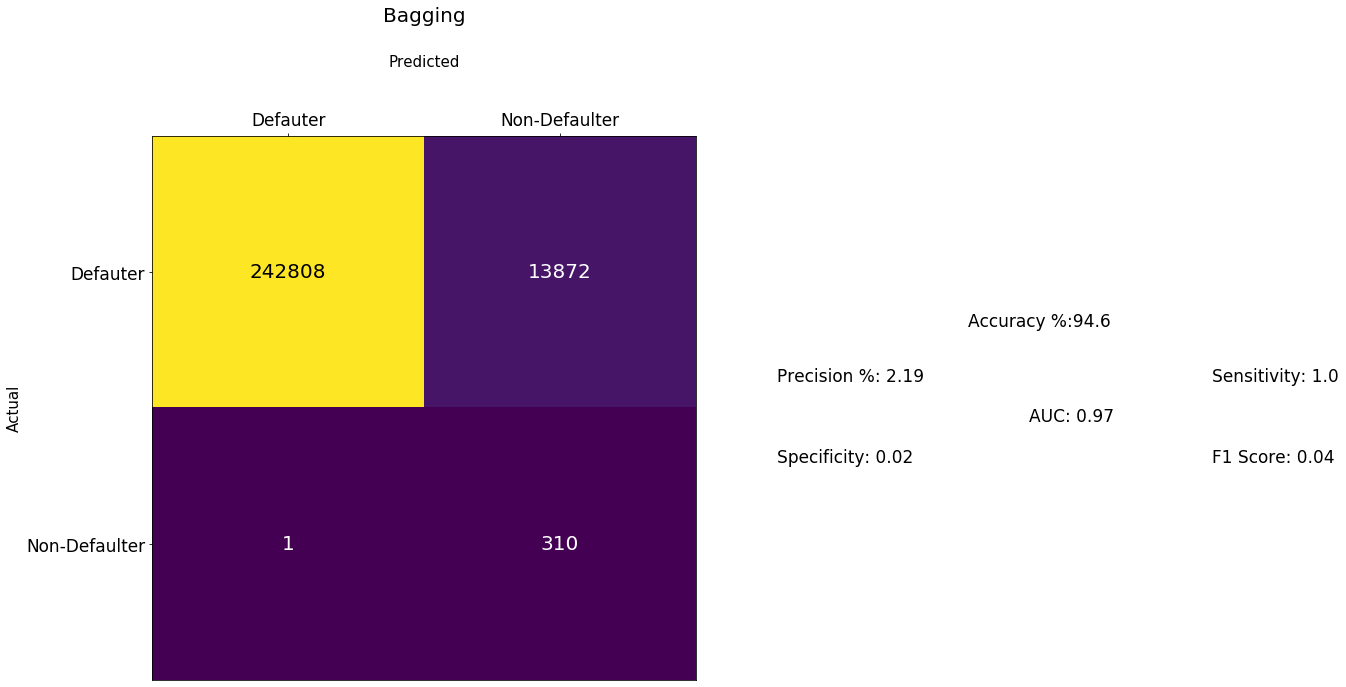

In [171]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Bagging')

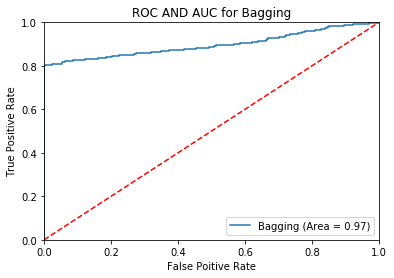

In [172]:
roc_auc_plot(test_y, pred_y, 'Bagging')

In [173]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 1.00


### KNN

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
knn_mod = KNeighborsClassifier()

In [176]:
knn_mod.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [177]:
pred_y = knn_mod.predict(test_X)

In [178]:
print(f'Accuracy %: {accuracy_score(test_y, pred_y) * 100}')

Accuracy %: 99.91011358374418


In [179]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.63      0.62      0.63       311

    accuracy                           1.00    256991
   macro avg       0.82      0.81      0.81    256991
weighted avg       1.00      1.00      1.00    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


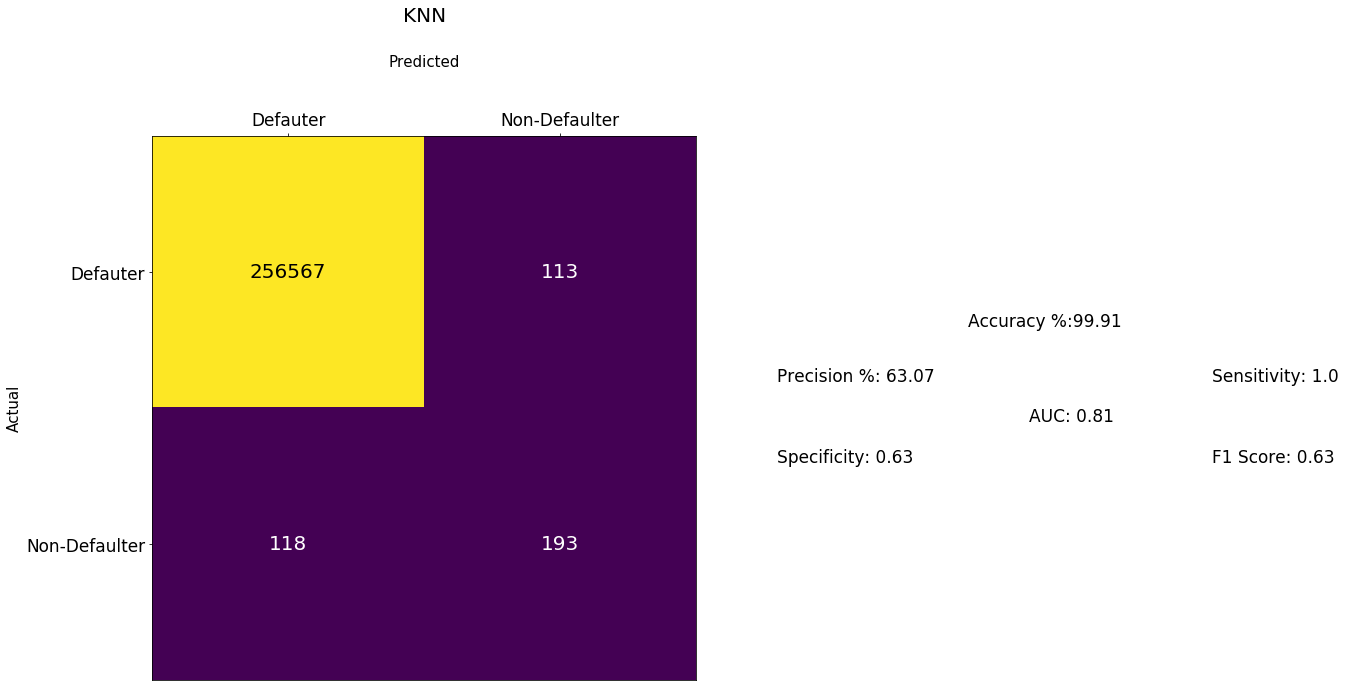

In [180]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'KNN')

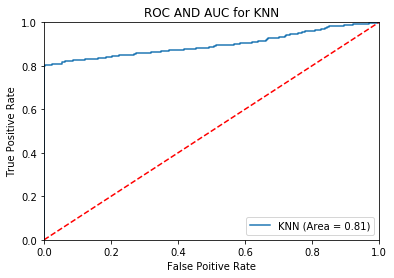

In [181]:
roc_auc_plot(test_y, pred_y, 'KNN')

In [182]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.62


### Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
ran_for_mod = RandomForestClassifier()

In [185]:
ran_for_mod.fit(train_X, train_y)

C:\Users\sragh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [186]:
pred_y = ran_for_mod.predict(test_X)

In [187]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    256680
           1       0.03      0.98      0.07       311

    accuracy                           0.97    256991
   macro avg       0.52      0.98      0.52    256991
weighted avg       1.00      0.97      0.98    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


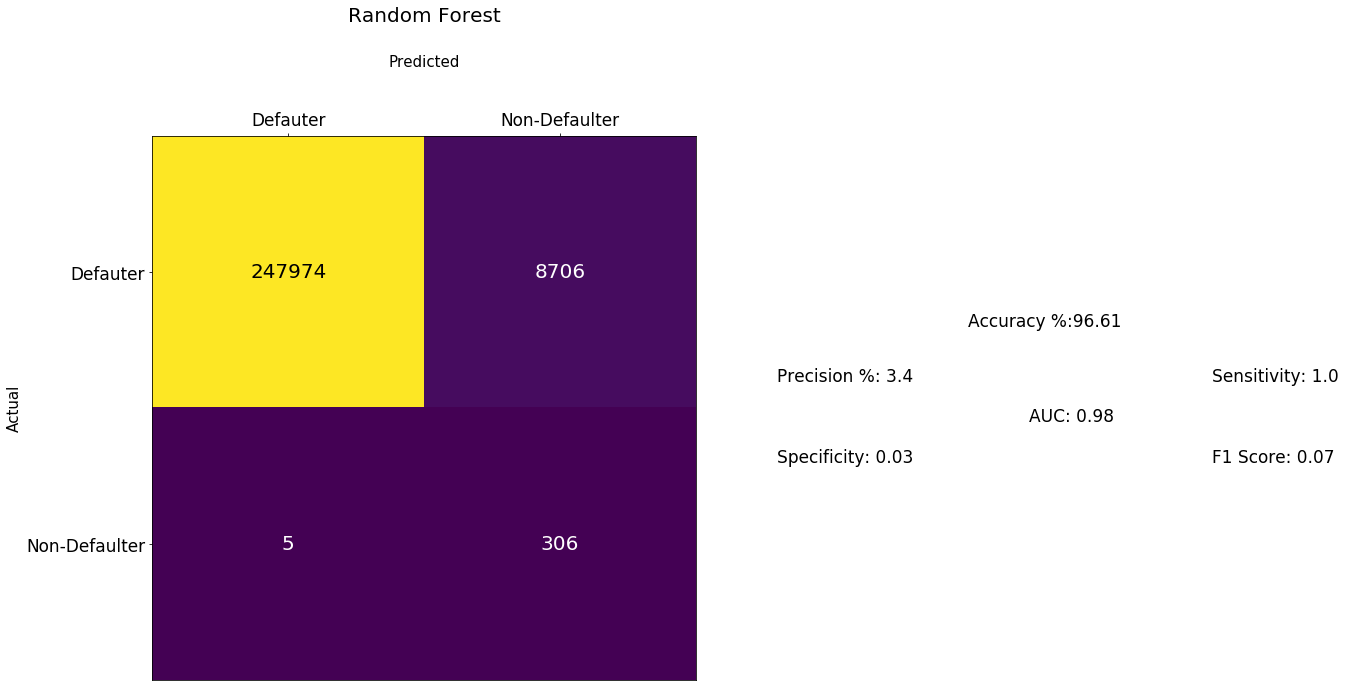

In [188]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Random Forest')

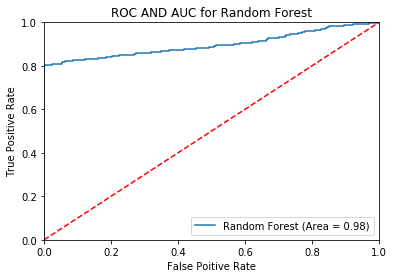

In [189]:
roc_auc_plot(test_y, pred_y, 'Random Forest')

In [190]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.98


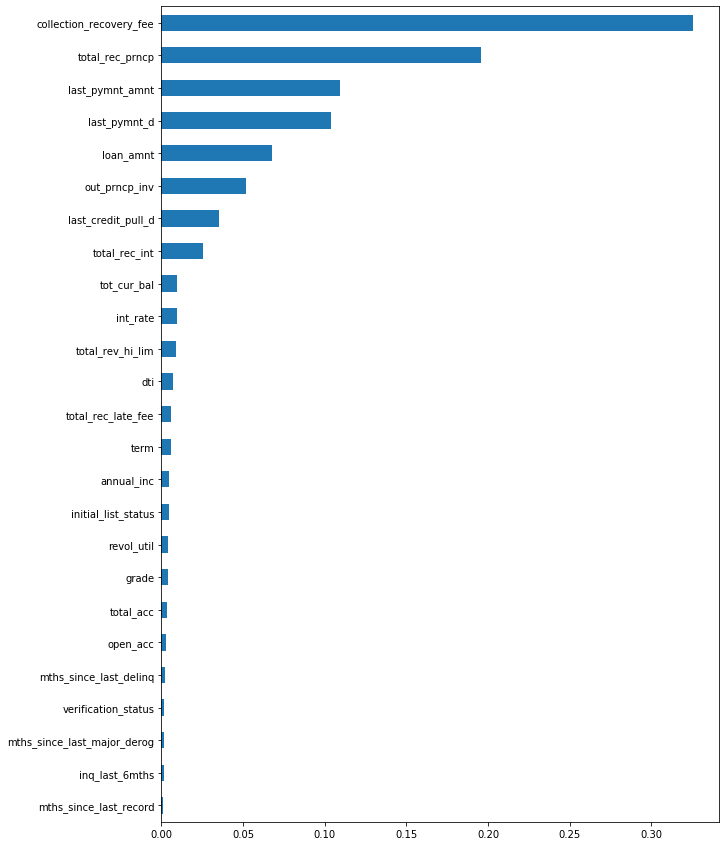

In [192]:
feat_importances = pd.Series(ran_for_mod.feature_importances_, index=train_X.columns)
feat_importances.nlargest(25).plot(kind='barh', figsize = (10, 15)).invert_yaxis()

## Fine Tuning

Since the data is imbalanced, oversampling using SMOTE and then running the models

In [193]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [194]:
print("Before OverSampling, counts of label '1': {}".format(sum(train_y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(train_y == 0))) 

sm = SMOTE(random_state=12, ratio = 1.0)
train_X_res, train_y_res = sm.fit_sample(train_X, train_y)

print('After OverSampling, the shape of train_X: {}'.format(train_X_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(train_y_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(train_y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(train_y_res == 0))) 

Before OverSampling, counts of label '1': 46156
Before OverSampling, counts of label '0': 552822 

After OverSampling, the shape of train_X: (1105644, 50)
After OverSampling, the shape of train_y: (1105644,) 

After OverSampling, counts of label '1': 552822
After OverSampling, counts of label '0': 552822


## Model Building - Part 02

### Logistic Regression

In [195]:
log_reg_mod.fit(train_X_res, train_y_res)

C:\Users\sragh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
pred_y = log_reg_mod.predict(test_X)

In [197]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.25      0.81      0.38       311

    accuracy                           1.00    256991
   macro avg       0.63      0.90      0.69    256991
weighted avg       1.00      1.00      1.00    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


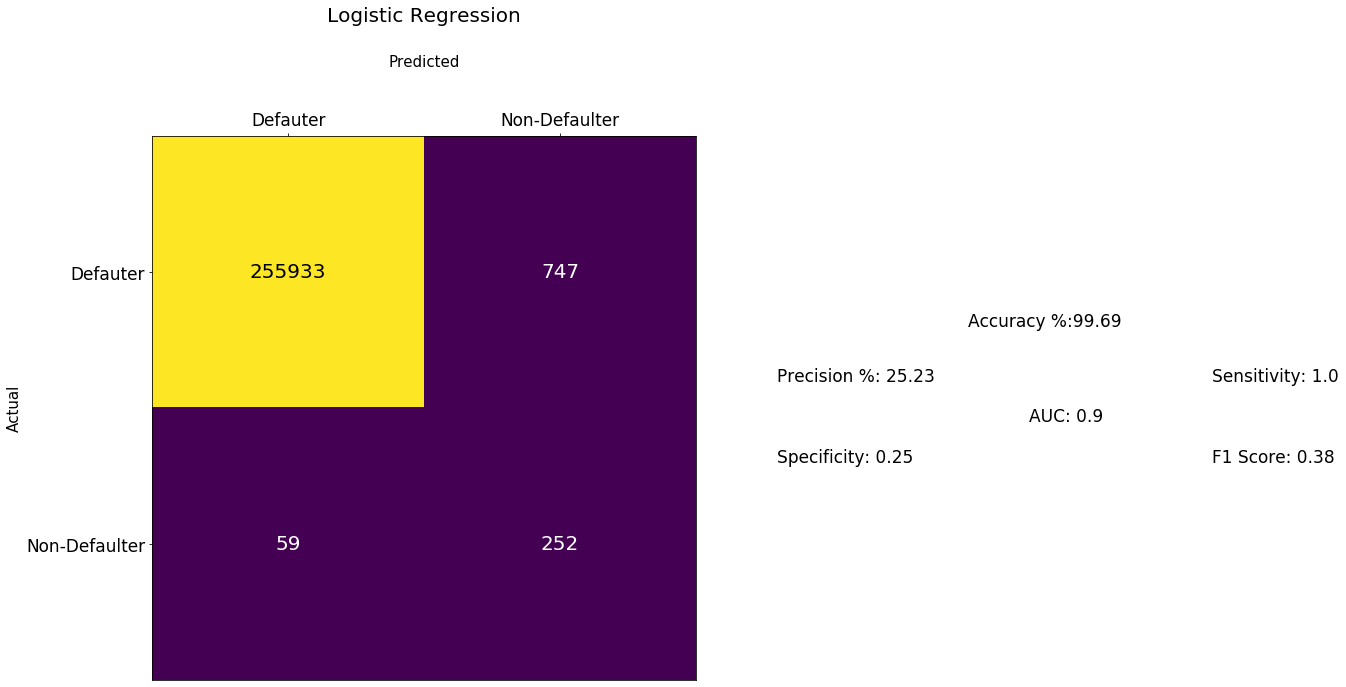

In [198]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Logistic Regression')

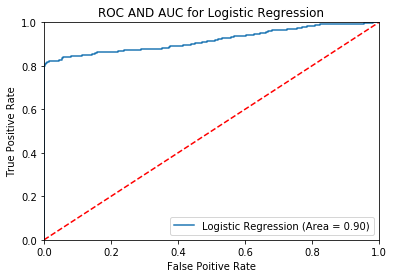

In [199]:
roc_auc_plot(test_y, pred_y, 'Logistic Regression')

In [200]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.81


### Decision Tree

#### Via GINI Index

Lower the better (less impure)

In [201]:
dec_tre_gini.fit(train_X_res, train_y_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [202]:
pred_y = dec_tre_gini.predict(test_X)

C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


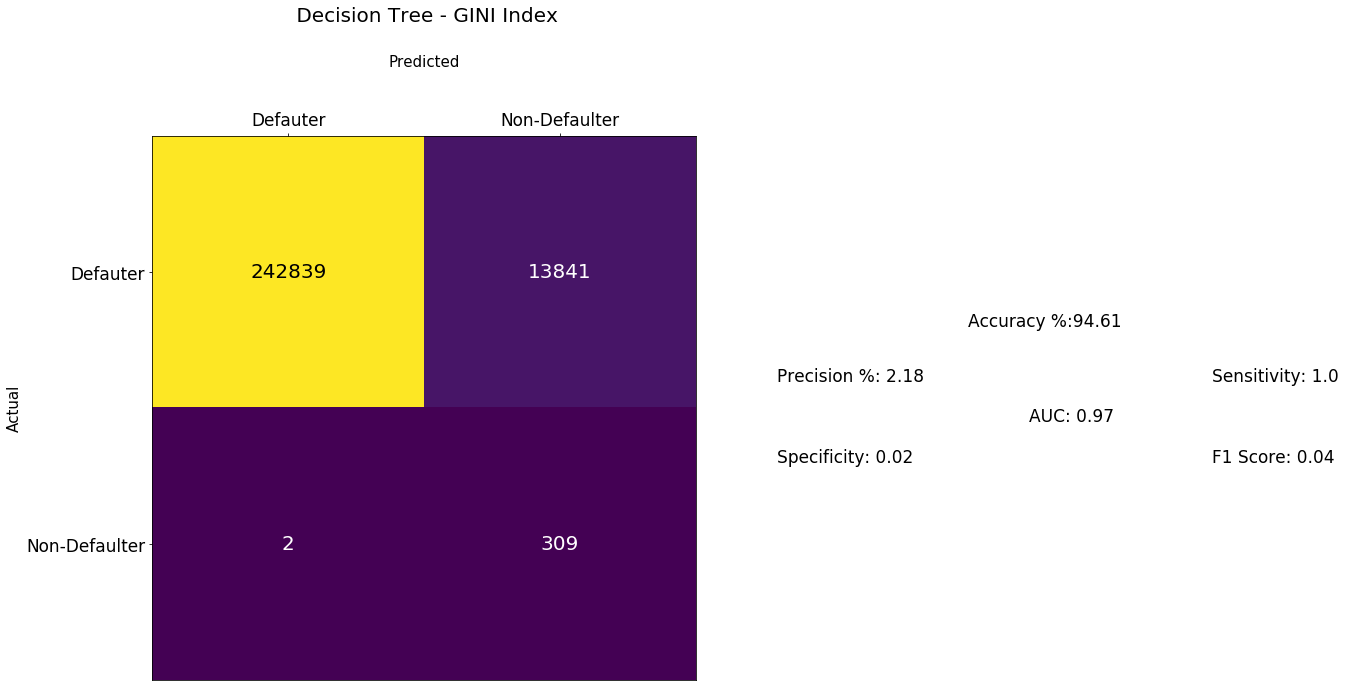

In [203]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = ' Decision Tree - GINI Index')

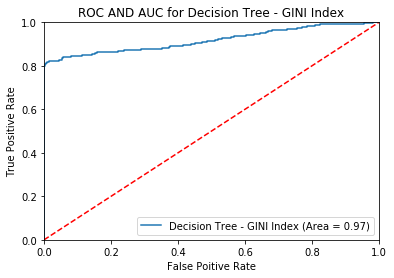

In [204]:
roc_auc_plot(test_y, pred_y, 'Decision Tree - GINI Index')

In [205]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.99


#### Via Entropy

In [206]:
dec_tre_ent.fit(train_X_res, train_y_res)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [207]:
pred_y = dec_tre_ent.predict(test_X)

In [208]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    256680
           1       0.03      0.99      0.06       311

    accuracy                           0.96    256991
   macro avg       0.52      0.98      0.52    256991
weighted avg       1.00      0.96      0.98    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


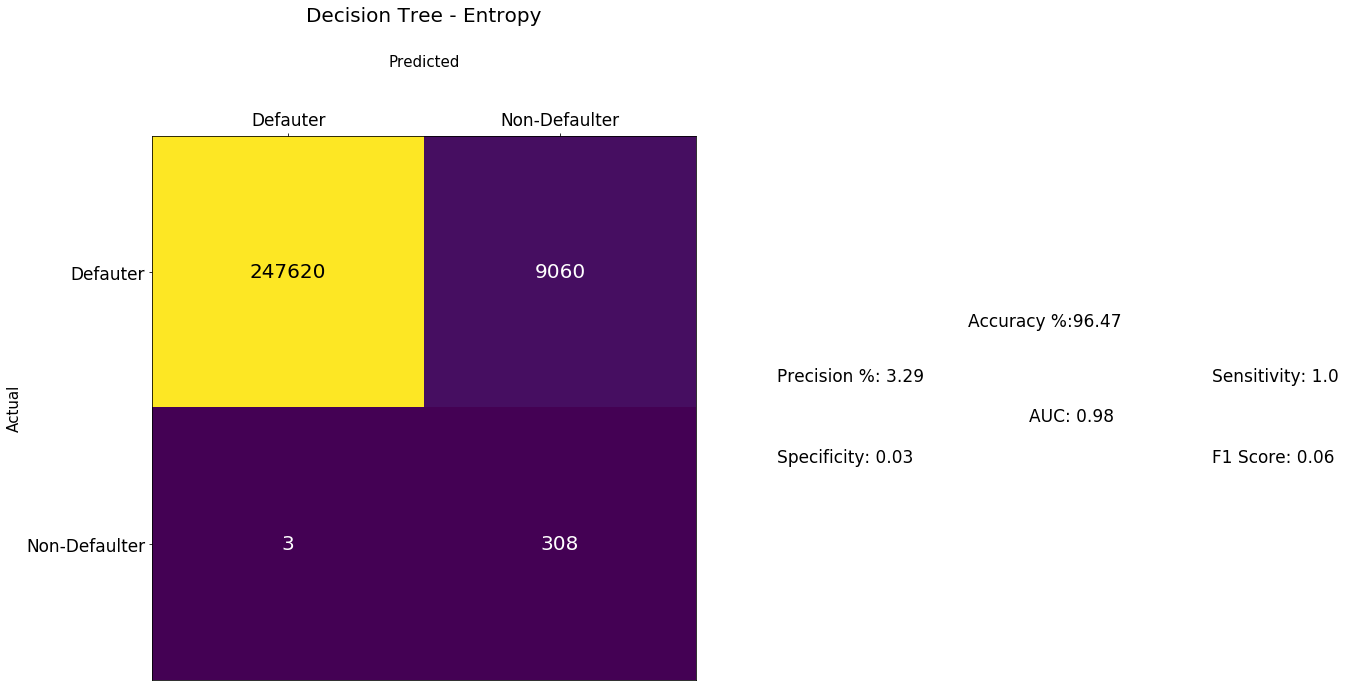

In [209]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Decision Tree - Entropy')

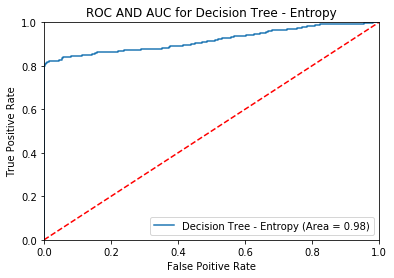

In [210]:
roc_auc_plot(test_y, pred_y, 'Decision Tree - Entropy')

In [211]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.99


### Bagging - Boot-strap AGGregation

In [212]:
bag_mod = BaggingClassifier()

In [213]:
bag_mod.fit(train_X_res, train_y_res)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [214]:
pred_y = bag_mod.predict(test_X)

In [215]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    256680
           1       0.04      1.00      0.07       311

    accuracy                           0.97    256991
   macro avg       0.52      0.98      0.53    256991
weighted avg       1.00      0.97      0.98    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


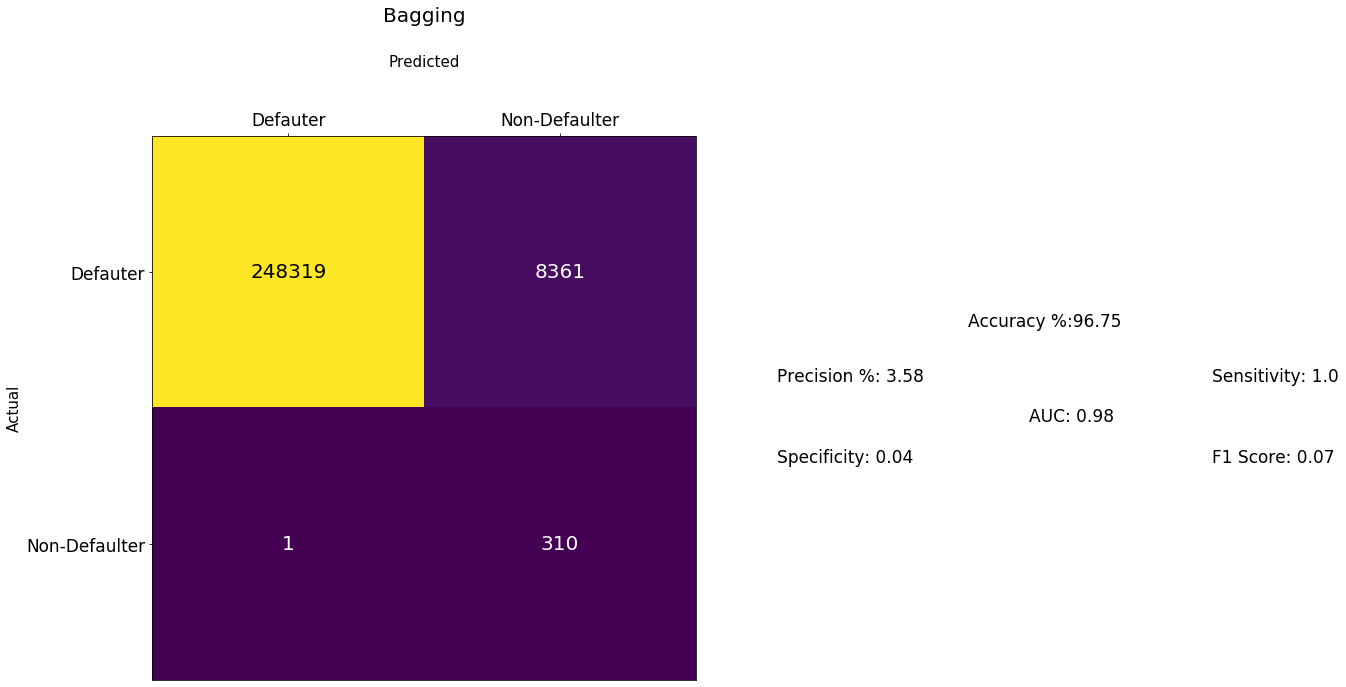

In [216]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Bagging')

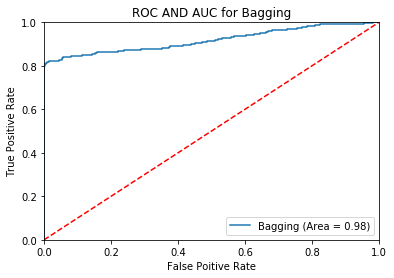

In [217]:
roc_auc_plot(test_y, pred_y, 'Bagging')

In [218]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 1.00


### KNN

In [219]:
knn_mod = KNeighborsClassifier()

In [220]:
knn_mod.fit(train_X_res, train_y_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [221]:
pred_y = knn_mod.predict(test_X)

In [222]:
print(f'Accuracy %: {accuracy_score(test_y, pred_y) * 100}')

Accuracy %: 96.8944437742956


In [223]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    256680
           1       0.03      0.74      0.05       311

    accuracy                           0.97    256991
   macro avg       0.51      0.86      0.52    256991
weighted avg       1.00      0.97      0.98    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


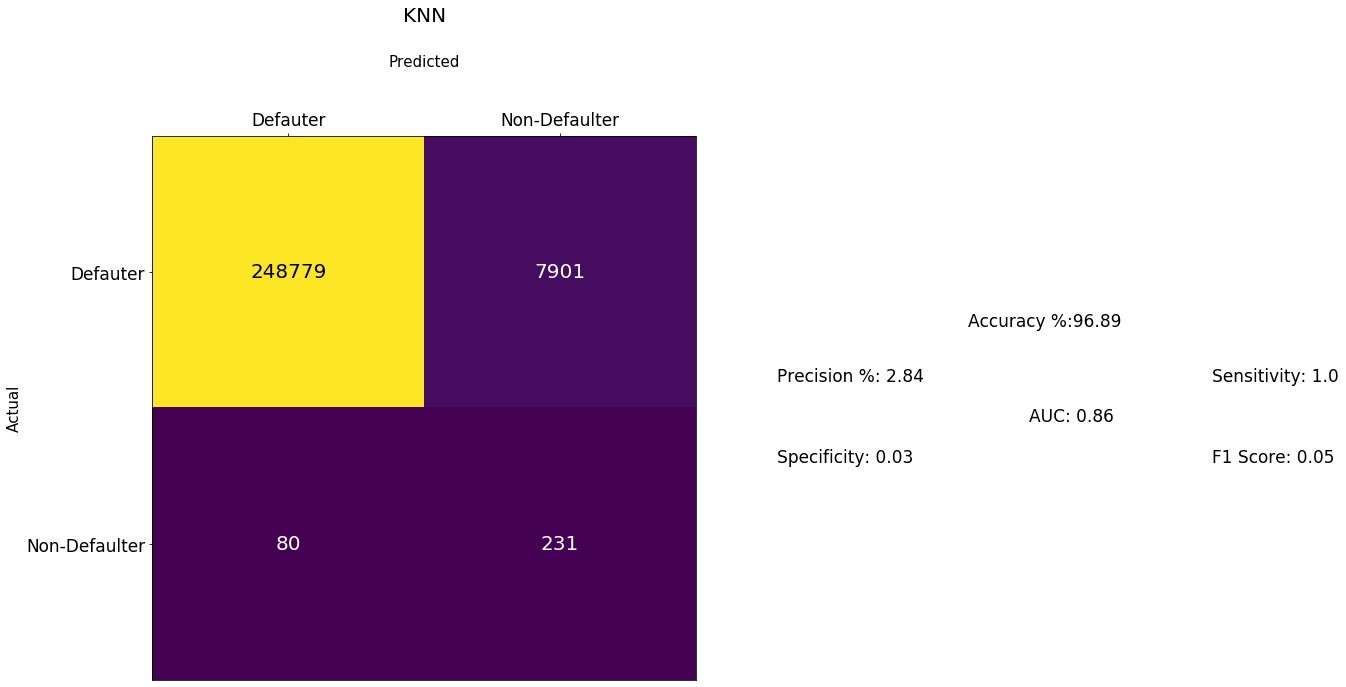

In [224]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'KNN')

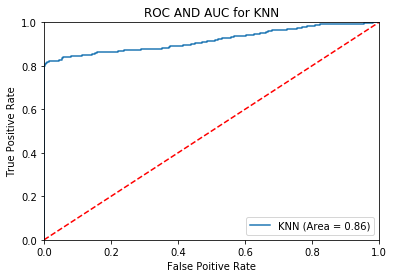

In [225]:
roc_auc_plot(test_y, pred_y, 'KNN')

In [226]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.74


### Random Forest

In [227]:
ran_for_mod = RandomForestClassifier()

In [228]:
ran_for_mod.fit(train_X_res, train_y_res)

C:\Users\sragh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [229]:
pred_y = ran_for_mod.predict(test_X)

In [230]:
print('Classification Report')
print(classification_report(test_y, pred_y))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    256680
           1       0.03      0.97      0.07       311

    accuracy                           0.97    256991
   macro avg       0.52      0.97      0.53    256991
weighted avg       1.00      0.97      0.98    256991



C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


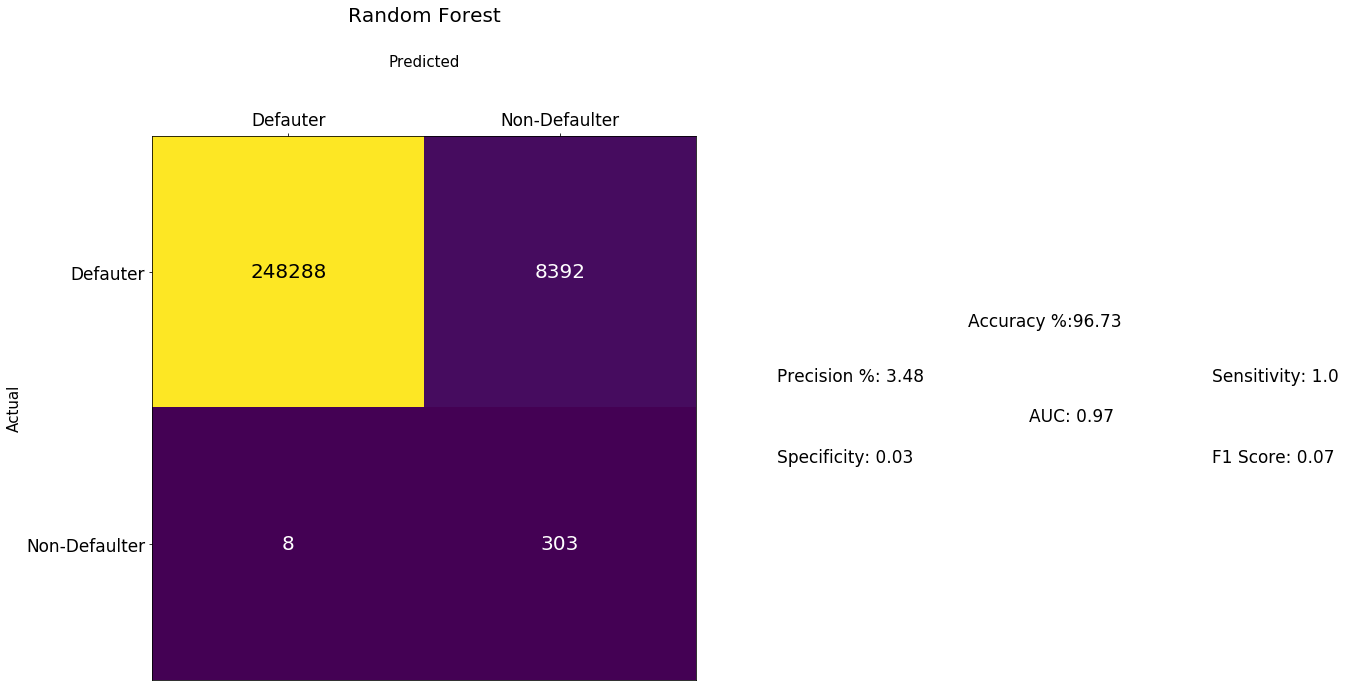

In [231]:
plot_ConfusionMatrix_metrics(confusion_matrix(test_y, pred_y), test_y, pred_y, class_names = ['Defaulter', 'Defauter', 'Non-Defaulter'], title = 'Random Forest')

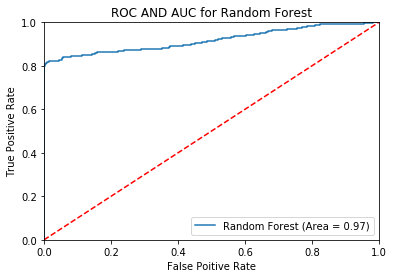

In [232]:
roc_auc_plot(test_y, pred_y, 'Random Forest')

In [233]:
print(f'\033[1m Majority Class Precision:\033[0m {classification_report(test_y, pred_y).split()[5]}')
print(f'\033[1m Minority Class Recall:\033[0m {classification_report(test_y, pred_y).split()[11]}')

 Majority Class Precision: 1.00
 Minority Class Recall: 0.97


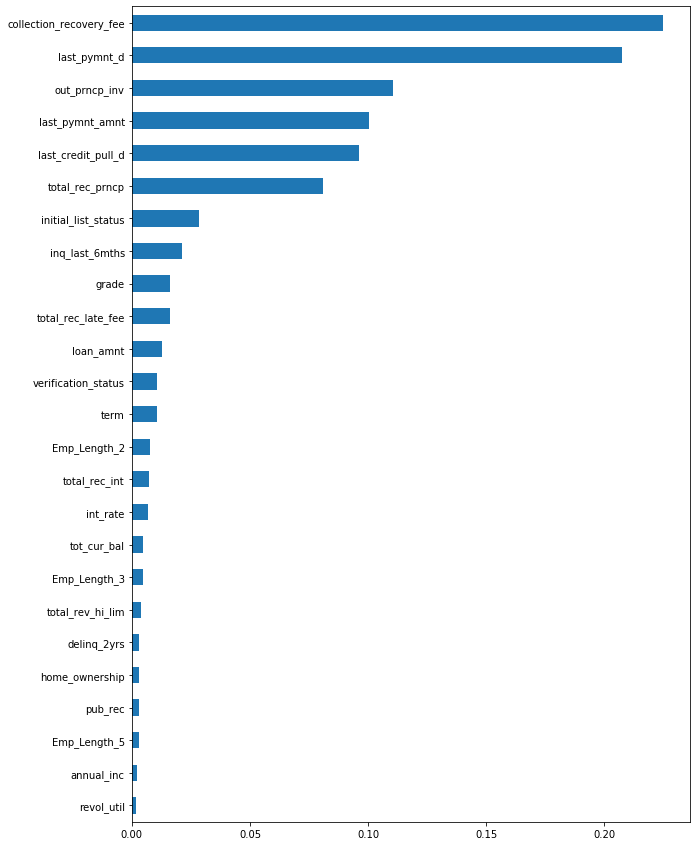

In [235]:
feat_importances = pd.Series(ran_for_mod.feature_importances_, index=train_X.columns)
feat_importances.nlargest(25).plot(kind='barh', figsize = (10, 15)).invert_yaxis()

## As seen if the loan defaulter prediction are more important then Logistic is the better model, whereas for loan non-defaulter prediction Bagging proves as a better model